In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc
import numpy as np
import scipy as sp
import datetime as dt
import netCDF4 as nc
import pickle
import cmocean as cm
import glob

%matplotlib inline

In [5]:
car_suffix = '_dissolved_inorganic_carbon_means_perday_alg2.pkl'
car_suffix_sum = '_dissolved_inorganic_carbon_sums_perday_alg2.pkl'

In [6]:


BR1 = 'BR_1st_2015'; BR2 = 'BR_2nd_2015'; LA1 = 'PI_1st_2015'; LA2 = 'PI_2nd_2015'; LA3 = 'PI_3rd_2015';
PI1 = 'PI_ACBC_2015'; PI2 = 'PI_ACBC_2015_2'; PI3 = 'PI_ACBC_2015_3'

LA3rr = 'LA3'
PI3rr = 'PI3'

#var
BR1_var = pickle.load(open('./pickles/'+BR1+car_suffix , 'rb')) 
LA1_var = pickle.load(open('./pickles/'+LA1+car_suffix , 'rb'))
PI1_var = pickle.load(open('./pickles/'+PI1+car_suffix , 'rb'))
BR2_var = pickle.load(open('./pickles/'+BR2+car_suffix , 'rb')) 
LA2_var = pickle.load(open('./pickles/'+LA2+car_suffix , 'rb'))
PI2_var = pickle.load(open('./pickles/'+PI2+car_suffix , 'rb'))
LA3_var = pickle.load(open('./pickles/'+LA3+car_suffix , 'rb'))
PI3_var = pickle.load(open('./pickles/'+PI3+car_suffix , 'rb'))

BR1_var_sum = pickle.load(open('./pickles/'+BR1+car_suffix_sum , 'rb')) 
LA1_var_sum = pickle.load(open('./pickles/'+LA1+car_suffix_sum , 'rb'))
PI1_var_sum = pickle.load(open('./pickles/'+PI1+car_suffix_sum , 'rb'))
BR2_var_sum = pickle.load(open('./pickles/'+BR2+car_suffix_sum , 'rb')) 
LA2_var_sum = pickle.load(open('./pickles/'+LA2+car_suffix_sum , 'rb'))
PI2_var_sum = pickle.load(open('./pickles/'+PI2+car_suffix_sum , 'rb'))
LA3_var_sum = pickle.load(open('./pickles/'+LA3+car_suffix_sum , 'rb'))
PI3_var_sum = pickle.load(open('./pickles/'+PI3+car_suffix_sum , 'rb'))

PI3rr_var_sum = pickle.load(open('./'+PI3rr+car_suffix_sum , 'rb'))
LA3rr_var_sum = pickle.load(open('./'+LA3rr+car_suffix_sum , 'rb'))


mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
bath = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')

csize = pickle.load(open('./pickles/cellsize_alg2.pkl', 'rb'))


In [45]:


PI_2_to_PI3_rr = np.hstack((PI2_var_sum,PI3rr_var_sum))
PI_2_to_PI3 = np.hstack((PI2_var_sum,PI3_var_sum))

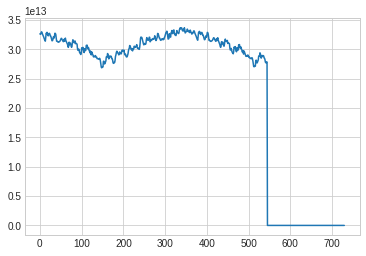

## By-layer visualization of mass-balance PI_2 to PI_3_rerun

### there is a discontinuity, why?

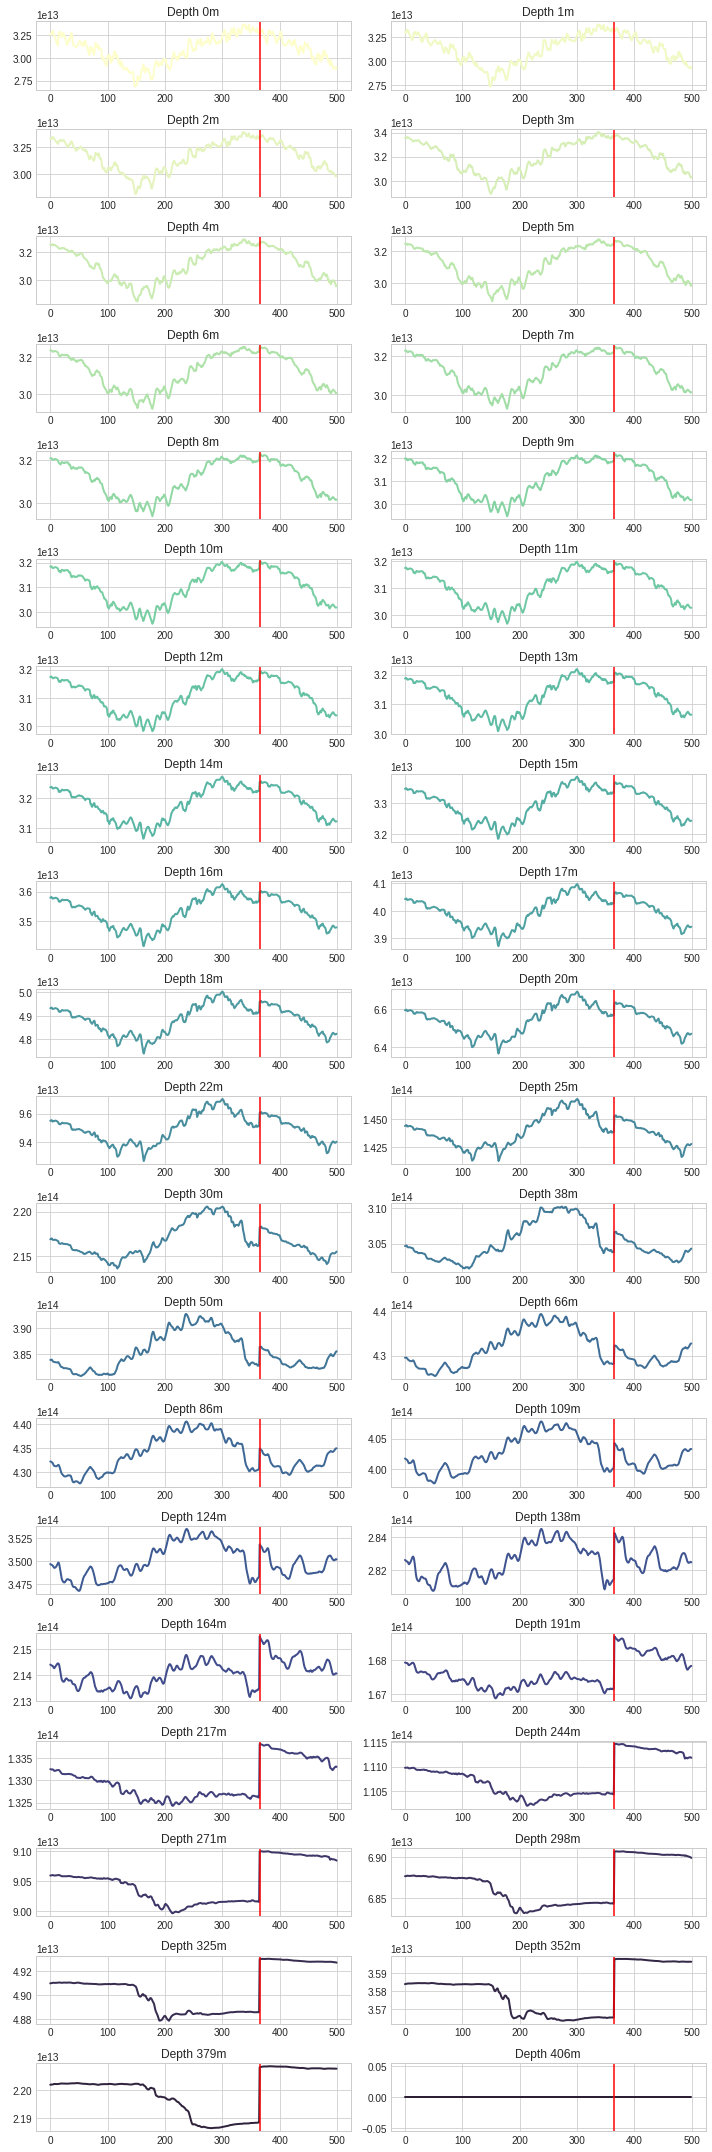

In [43]:
mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
depth = mesh['e3t_0'][0,:,250,250]
fact = 10
fs = 12
fig = plt.figure(figsize=(1*fact,3*fact))
days_in = np.arange(0,365*2,1)
tcm = cm.cm.deep
lw =2 

for i in range(0,40):
    ax = fig.add_subplot(20,2,i+1)
    zdepth = np.sum(depth[0:i])
    
    ax.set_title('Depth ' + str(int(zdepth)) +'m')
    ax.plot(PI_2_to_PI3_rr[i,0:500],color = tcm(1.*i/40), linewidth = lw)
    plt.axvline(x=365,color='r')
    
    
plt.tight_layout()
#plt.title('BR Run: Mean var concentration by depth', fontsize = fs )

## By-layer visualization of mass-balance PI_2 to PI_3

### there is no discontinuity. Did I make an error in setting up the restart file?


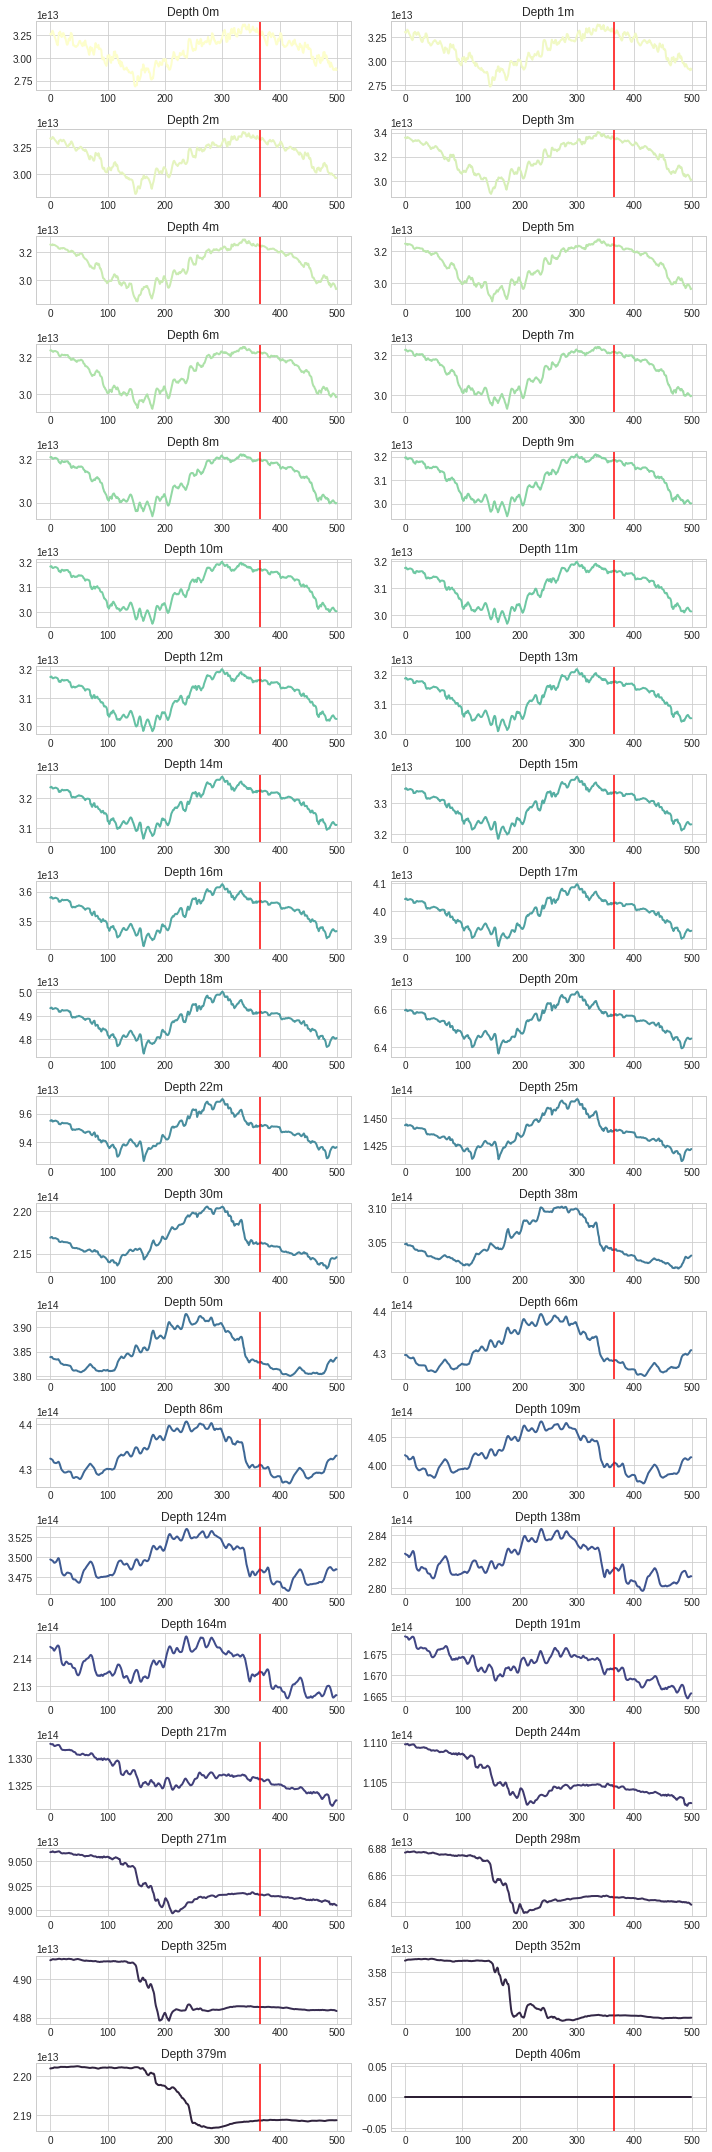

In [47]:
mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
depth = mesh['e3t_0'][0,:,250,250]
fact = 10
fs = 12
fig = plt.figure(figsize=(1*fact,3*fact))
days_in = np.arange(0,365*2,1)
tcm = cm.cm.deep
lw =2 

for i in range(0,40):
    ax = fig.add_subplot(20,2,i+1)
    zdepth = np.sum(depth[0:i])
    
    ax.set_title('Depth ' + str(int(zdepth)) +'m')
    ax.plot(PI_2_to_PI3[i,0:500],color = tcm(1.*i/40), linewidth = lw)
    plt.axvline(x=365,color='r')
    
    
plt.tight_layout()
#plt.title('BR Run: Mean var concentration by depth', fontsize = fs )

# restart file from PI_3 (so, segment PI_25_beluga.yaml):

    dir:
    SS-run-sets/SalishSea/nemo3.6/tereza/BASERUN_PREIND_EXP/PI_ACBC_1st2015_nolatflux
    
    yaml: 
    PI_25_beluga.yaml
    
    restart:
      restart.nc: /scratch/tjarnik/PI_ACBC_2015_2/27nov15/SKOG_04840560_restart.nc
      restart_trc.nc: /scratch/tjarnik/PI_ACBC_2015_2/27nov15/SKOG_04840560_restart_trc.nc
      
      on salish should be at:
      
      pi_restart = nc.Dataset('/data/tjarniko/results/BASERUN_EXP/\
        NOT_MAIN_ANALYSIS/PI_ACBC_2015_2/ncs/SKOG_04840560_restart_trc.nc
      
# restart file from PI_3_rr (so, segment PI_25_beluga.yaml):

    dir: 
    SS-run-sets/SalishSea/nemo3.6/tereza/BASERUN_PREIND_EXP/PI_LA_rerun_year3/PI_yr3
    
    yaml:
        vim PI_1.yaml
    restart:
      restart.nc: /scratch/tjarnik/PILA3_rerun/PI3/SKOG_04840560_restart.nc
      restart_trc.nc: /scratch/tjarnik/PILA3_rerun/PI3/SKOG_04840560_restart_trc.nc
      
      
    this restart file was made using Making_restarts_for_rerun.ipynb.
    all fields except the DIC/TA ones were meant to be from the end of BR2
    the DIC/TA fields were meant to be from the end of PI_2 (above), and should be identical
    
    I copied these restarts to PI_restart.nc and PI_restart_trc.nc
    and then copied them to the present directory
    
# the question - are the restarts for PI_3 and PI_3rr identical in DIC/TA?

In [55]:
pi3_restart = nc.Dataset('/data/tjarniko/results/BASERUN_EXP/NOT_MAIN_ANALYSIS/PI_ACBC_2015_2/ncs/SKOG_04840560_restart_trc.nc')
pi3rr_restart = nc.Dataset('./PI3_restart_trc.nc')
br_restart = nc.Dataset('/data/tjarniko/results/BASERUN_EXP/MAIN/BR_2nd_2015/ncs/SKOG_02471040_restart_trc.nc')

In [58]:
print(pi3rr_restart)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): x(398), y(898), z(40), t(1)
    variables(dimensions): float32 nav_lon(y,x), float32 nav_lat(y,x), float32 nav_lev(z), float64 time_counter(t), float64 kt(), float64 ndastp(), float64 adatrj(), float64 rnf_pis_NO3_b(t,y,x), float64 rnf_pis_NH4_b(t,y,x), float64 rnf_pis_Si_b(t,y,x), float64 rnf_pis_DIAT_b(t,y,x), float64 rnf_pis_PHY_b(t,y,x), float64 rnf_pis_MYRI_b(t,y,x), float64 rnf_pis_MICZ_b(t,y,x), float64 rnf_pis_DON_b(t,y,x), float64 rnf_pis_PON_b(t,y,x), float64 rnf_pis_bSi_b(t,y,x), float64 rnf_pis_TRA_b(t,y,x), float64 rnf_pis_DIC_b(t,y,x), float64 rnf_pis_TA_b(t,y,x), float64 rnf_pis_O2_b(t,y,x), float64 sbc_NO3_b(t,y,x), float64 sbc_NH4_b(t,y,x), float64 sbc_Si_b(t,y,x), float64 sbc_DIAT_b(t,y,x), float64 sbc_PHY_b(t,y,x), float64 sbc_MYRI_b(t,y,x), float64 sbc_MICZ_b(t,y,x), float64 sbc_DON_b(t,y,x), float64 sbc_PON_b(t,y,x), float64 sbc_bSi_b(t,y,x), float64 sbc_TRA

In [56]:
DIC_pi3 = pi3_restart['TRNDIC']
DIC_pi3rr= pi3rr_restart['TRNDIC']
DIC_br = br_restart['TRNDIC']

In [54]:
np.array_equal(DIC_pi3,DIC_pi3rr)

False

In [57]:
np.array_equal(DIC_pi3rr,DIC_br)

True

In [59]:
br_restart = nc.Dataset('/data/tjarniko/results/BASERUN_EXP/\
MAIN/BR_2nd_2015/ncs/SKOG_02471040_restart_trc.nc')
pi_restart = nc.Dataset('/data/tjarniko/results/BASERUN_EXP/\
NOT_MAIN_ANALYSIS/PI_ACBC_2015_2/ncs/SKOG_04840560_restart_trc.nc')

dsin = br_restart

#output file
ncname = 'PI3rr_restart_trc.nc'
dsout = nc.Dataset(ncname, "w", format="NETCDF4")
#Copy dimensions
for dname, the_dim in dsin.dimensions.items():
    print(dname)
    print(len(the_dim))
    dsout.createDimension(dname, len(the_dim) if not the_dim.isunlimited() else None)
# Copy variables
for v_name, varin in dsin.variables.items():
    outVar = dsout.createVariable(v_name, varin.datatype, varin.dimensions)
    print(varin.datatype)
    
    # Copy variable attributes
    outVar.setncatts({k: varin.getncattr(k) for k in varin.ncattrs()})
    
    outVar[:] = varin[:]
    

dsout['TRNDIC'][:] = pi_restart['TRNDIC'][:]
dsout['TRNTA'][:] = pi_restart['TRNTA'][:]
dsout['TRBDIC'][:] = pi_restart['TRBDIC'][:]
dsout['TRBTA'][:] = pi_restart['TRBTA'][:]


dsout.close()

x
398
y
898
z
40
t
1
float32
float32
float32
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64


In [65]:
br_restart = nc.Dataset('/data/tjarniko/results/BASERUN_EXP/MAIN/BR_2nd_2015/ncs/SKOG_02471040_restart_trc.nc')

pi3_restart = nc.Dataset('/data/tjarniko/results/BASERUN_EXP/NOT_MAIN_ANALYSIS/PI_ACBC_2015_2/ncs/SKOG_04840560_restart_trc.nc')
pi3rr_restart = nc.Dataset('./PI3_restart_trc.nc')

pi3rr_2_restart = nc.Dataset('./PI3rr_restart_trc.nc')

la3_restart = nc.Dataset('/data/tjarniko/results/BASERUN_EXP/\
NOT_MAIN_ANALYSIS/PI_2nd_2015/LA2_rerun_from26dec15/SKOG_02473200_restart_trc.nc')
la3rr_restart = nc.Dataset('./LA3_restart_trc.nc')

In [66]:
pi3rr_2_restart_DIC = pi3rr_2_restart['TRBDIC']
pi3_restart_DIC = pi3_restart['TRBDIC']
la3_restart_DIC = la3_restart['TRBDIC']
la3rr_restart_DIC = la3rr_restart['TRBDIC']


True

In [67]:
np.array_equal(pi3rr_2_restart_DIC,pi3_restart_DIC)

True

In [68]:
np.array_equal(la3_restart_DIC,la3rr_restart_DIC)

True